In [9]:
import tensorflow as tf  #tf >2.0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.test.is_gpu_available()


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [10]:
train_datagen= ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                    zoom_range=0.2,
                                  vertical_flip=True,
                                  horizontal_flip=True)

In [11]:
training_set = train_datagen.flow_from_directory(r'.\monkeybreedDS\train',
                                                 target_size=(224,224),class_mode='categorical',batch_size=16
                                         )

Found 1098 images belonging to 10 classes.


In [12]:
# Test Set
test_datagen= ImageDataGenerator(rescale=1./255)

test_set= test_datagen.flow_from_directory(r'.\monkeybreedDS\\validation',
                                          target_size=(224,224),class_mode='categorical',batch_size=16)

Found 272 images belonging to 10 classes.


In [13]:
#Initalising the CNN
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu',input_shape=[224,224,3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 128)               1

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



In [17]:
history=model.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
69/69 [==============================] - 151s 2s/step - loss: 2.2728 - accuracy: 0.1931 - val_loss: 1.9104 - val_accuracy: 0.3346
Epoch 2/10
69/69 [==============================] - 137s 2s/step - loss: 1.7288 - accuracy: 0.3907 - val_loss: 1.7286 - val_accuracy: 0.3713
Epoch 3/10
69/69 [==============================] - 141s 2s/step - loss: 1.5157 - accuracy: 0.4472 - val_loss: 1.4213 - val_accuracy: 0.4596
Epoch 4/10
69/69 [==============================] - 136s 2s/step - loss: 1.4106 - accuracy: 0.4909 - val_loss: 1.4153 - val_accuracy: 0.4926
Epoch 5/10
69/69 [==============================] - 136s 2s/step - loss: 1.2988 - accuracy: 0.5364 - val_loss: 1.4964 - val_accuracy: 0.4449
Epoch 6/10
69/69 [==============================] - 131s 2s/step - loss: 1.2611 - accuracy: 0.5446 - val_loss: 1.3806 - val_accuracy: 0.5368
Epoch 7/10
69/69 [==============================] - 138s 2s/step - loss: 1.1719 - accuracy: 0.5847 - val_loss: 1.3238 - val_accuracy: 0.5184
Epoch 8/10
69

In [18]:
history.model.save(r'.\monkeybreedDS\model-10.h5')


In [23]:
model_load=tf.keras.models.load_model(r'.\monkeybreedDS\model-10.h5')


In [24]:
model_load.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 128)               1

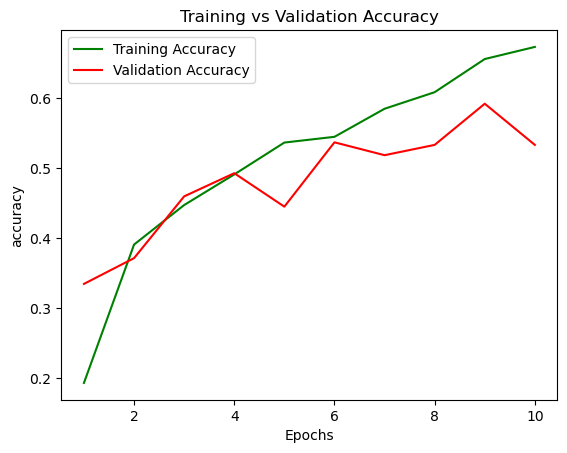

In [25]:
import matplotlib.pyplot as plt
acc_train=history.history['accuracy']
acc_val=history.history['val_accuracy']
epochs=range(1,11)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'r',label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

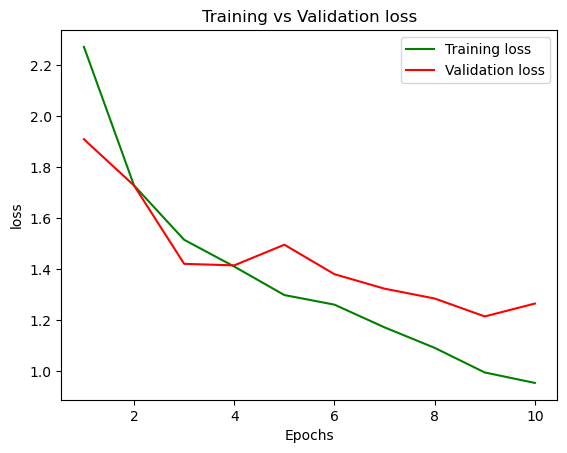

In [26]:
import matplotlib.pyplot as plt
loss_train=history.history['loss']
loss_val=history.history['val_loss']
epochs=range(1,11)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'r',label='Validation loss')
plt.title("Training vs Validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


In [27]:
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow.keras.preprocessing import image

In [28]:
txt=pd.read_csv(r'.\monkeybreedDS\monkey_labels.txt')



In [29]:
txt

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


1/1 [==============================] - 0s 68ms/step
Prob  [[1.4166766e-01 2.8176047e-04 3.4078734e-04 5.8355348e-05 7.6619658e-04
  6.0651273e-01 4.8293697e-04 8.4386946e-04 3.0419468e-03 2.4600372e-01]]


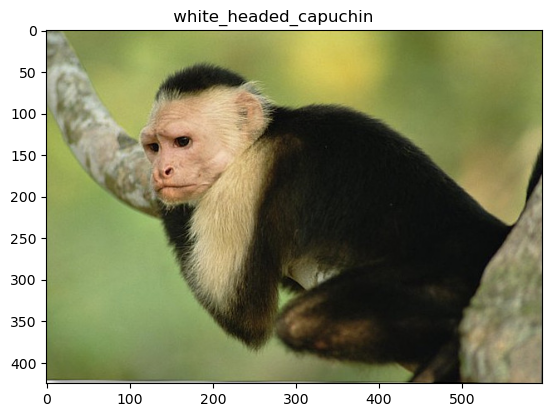

In [31]:
test_image=r'.\monkeybreedDS\train\n5\n5022.jpg'
open_image=Image.open(test_image)
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
# print(test_image.shape)

test_image=np.expand_dims(test_image,axis=0)

# print(test_image.shape)

result=model.predict(test_image)
print("Prob ",result)

result=np.argmax(result)
# print("index ",result)

Name=txt.iloc[result]
Name=Name.iloc[2]
plt.imshow(open_image)
plt.title(Name)
plt.show()